# Comparing classifiers #

## Using Divorce classification data ##

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [71]:
df = pd.read_csv(".\\marriage.csv", header=None)

In [85]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0


In [266]:
#train test split
rs = 0 #random state
X = df.iloc[:, 0:len(df.columns)-1].values
y = df.iloc[:,-1:].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=rs)

#show shapes
for i in (X_train, X_test, y_train, y_test):
    display(i.shape)

(136, 54)

(34, 54)

(136, 1)

(34, 1)

LR: 0.942857 (0.069985)
KNN: 0.942857 (0.069985)
NB: 0.942857 (0.069985)


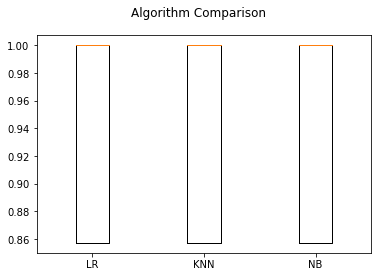

In [340]:
# Compare Algorithms
seed = 0
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB(priors = None, var_smoothing = 1e-03)))
#models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### As I vary seed for rng, I get slightly different results w.r.t. overall accuracy each run, but all 3 classifiers performed identically. Hypothesis for this phenomena is that the base data can be linearly separate very well. ###

_________________

### Now let's perform PCA to project the data into two-dimensional space. Plot the data points and decision boundary of each classier. ###

#### Splitting data first into the train and test set, fit PCA on the train set, then transform both the train and test on the fitted model. Applying PCA to the entire dataset before the train test split causes "data leakage" since the new basis vectors would now have information about the test set. ####

In [267]:
#train test split
rs = 0 #random state
X = df.iloc[:, 0:len(df.columns)-1].values
y = df.iloc[:,-1:].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=rs)

#show shapes
for i in (X_train, X_test, y_train, y_test):
    display(i.shape)
    
from sklearn.decomposition import PCA
X_train_reduced = PCA(n_components=2).fit(X_train).transform(X_train)
X_test_reduced = PCA(n_components=2).fit_transform(X_test)
display(X_train_reduced.shape)
display(X_test_reduced.shape)

(136, 54)

(34, 54)

(136, 1)

(34, 1)

(136, 2)

(34, 2)

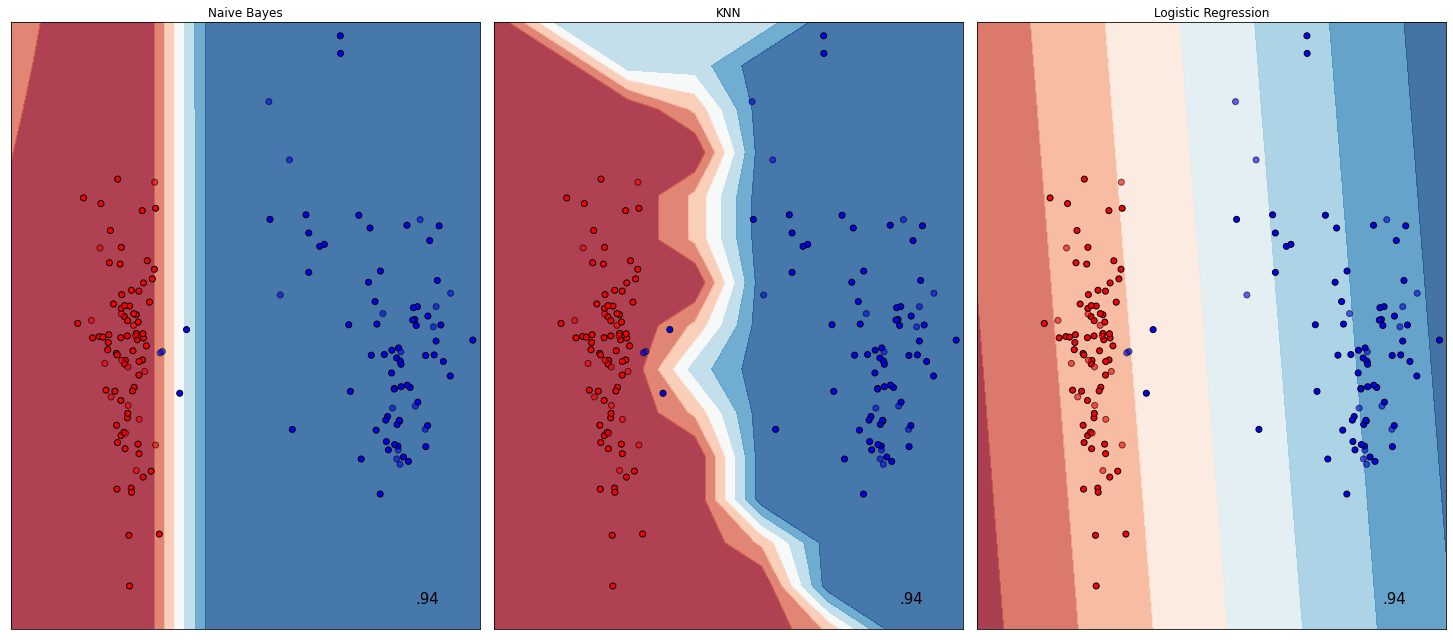

In [339]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .5  # step size in the mesh

names = ["Naive Bayes" , "KNN", "Logistic Regression"]

classifiers = [
    GaussianNB(priors = None, var_smoothing = 1e-03),
    KNeighborsClassifier(3),
    LogisticRegression()
    ]

figure = plt.figure(figsize=(27, 9))
i = 1

# iterate over datasets
#for ds_cnt, ds in enumerate(datasets):
# preprocess dataset, split into training and test part
#X, y = ds
#X = StandardScaler().fit_transform(X)
# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X_train_reduced[:, 0].min() - .5, X_train_reduced[:, 0].max() + .5
y_min, y_max = X_train_reduced[:, 1].min() - .5, X_train_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_train_reduced
# X_test_reduced
# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train_reduced, y_train)
    score = clf.score(X_test_reduced, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z2 = [0.0 if item <= np.median(Z) else 1.0 for item in Z] #To achive only 2 unique levels based on values
        Z2 = np.array(Z2) 
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z2 = [0.0 if item <= np.median(Z) else 1.0 for item in Z] #To achive only 2 unique levels based on values
        Z2 = np.array(Z2) 
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    Z2 = Z2.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    #ax.contourf(xx, yy, Z2, colors=['green'], alpha=.8)

    # Plot the training points
    ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

### I attempted to produce only 1 classification boundary by forcing $Z$ into 0 or 1 (2 unique levels), but was not getting an expected result, so making observations based on the plots above as is. ###


### NB's decision boundaries appear to be almost linear in this case, but I do see some curvatures in especially in the outer contours. ###
### KNN's decision boundaries, follow similar patterns as proximities between each participants (clusters). With this being non-parametric approach, this makes sense ###
### LR's decision boundaries are strictly linear, and gradients (shown in different colors) move in monotonic direction ###

_________________